# Анализ данных

Пара слов про изучение библиотек. Вам необязательно понимать, как что-либо работает под капотом, чтобы это использовать. Не закапывайтесь в исходники, если ваша цель просто научиться пользоваться функционалом.

Также не залезайте в документацию в попытках прочитать её от корки до корки (или найти максимально подробный гайд) и выучить всё - большая часть функционала вам вряд ли потребуется. Полезно знать, что какая-либо функция есть, но вовсе необязательно учить наизусть параметры, с которыми она вызывается. Всегда есть документация. Отталкивайтесь от решаемой задачи и не пытайтесь объять необъятное.

В следующих блоках рассматриваются только базовые вещи, которые чаще всего могут вам потребоваться.

Доп. материалы:

[YouTube Thu Vu data analytics](https://www.youtube.com/@Thuvu5)

[Гайд по NumPy](https://habr.com/ru/articles/352678/)

[Гайд по matplotlib](https://devpractice.ru/matplotlib-lesson-1-quick-start-guide/)

## numpy

NumPy расшифровывается как Numerical Python и является фундаментальным пакетом для вычислений в Python. Он обеспечивает эффективное хранение и обработку больших массивов числовых данных, а также широкий спектр математических функций для работы с этими массивами. NumPy написан на C++, что обеспечивает более высокую скорость и производительность по сравнению с чистым Python.

In [ ]:
import numpy as np  # Импорт библиотеки

Основной объект в NumPy - это массив (array). Он отличается от обычного списка тем, что может хранить только числовые данные одного типа. Есть несколько типов для целых чисел (int16, int32, int64) и чисел с плавающей точкой (float32, float64). Они отличаются тем, с какой точностью в памяти хранятся элементы массива.

In [ ]:
arr = np.array([1, 2, 10, 32, -8, 0])  # Конвертация списка в массив
print(arr.dtype)  # Так можно узнать тип данных, содержащихся в массиве
print(arr)

int64
[ 1  2 10 32 -8  0]


In [ ]:
arr = arr.astype(np.float64)  # Преобразование типов
print(arr.dtype)
print(arr)

float64
[ 1.  2. 10. 32. -8.  0.]


Еще немного про создание массивов.

In [ ]:
np.zeros((3, 3))  # 3x3 массив с нулями

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.ones((2, 4))  # 2x4 массив с единицами

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
np.random.rand(5)  # 1D массив случайных чисел от 0 до 1

array([0.67740623, 0.32213164, 0.79657061, 0.76256969, 0.10702579])

Очень полезным является `reshape`.

In [ ]:
range_arr = np.arange(0, 11, 2)  # Создать одномерный массив со значениями от 0 до 11 с шагом 2
range_arr.reshape(2, 3)  # Преобразовать его в матрицу (двумерный массив) 2x3

array([[ 0,  2,  4],
       [ 6,  8, 10]])

In [ ]:
arr = np.arange(9)
np.reshape(arr, (3, 3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Действия над массивами аналогичны действиям над списками.

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
print(arr[0])
print(arr[-2])

1
4


In [ ]:
print(arr[1:4])
print(arr[1::2])  # Срез с первого элемента до конца с шагом 2

[2 3 4]
[2 4]


Добавление в массив чуть сложнее, чем у списка, потому что при использовании `append` возвращается новый объект, а исходный массив не изменяется. Если вы хотите добавлять элементы много раз, лучше создать обычный список, а потом преобразовать его в массив.

In [ ]:
arr1 = np.array([1, 2, 3])
arr2 = np.append(arr1, 10)
arr3 = np.append(arr2, [-1, -2, -3])
print(arr1, arr2, arr3)

[1 2 3] [ 1  2  3 10] [ 1  2  3 10 -1 -2 -3]


In [ ]:
np.concatenate((arr1, arr2))  # Объединение нескольких массивов

array([ 1,  2,  3,  1,  2,  3, 10])

Функции `delete` и `insert` также не меняют массив на месте, а возвращают новый.

In [ ]:
a = np.arange(10)

In [ ]:
a = np.delete(a, [1, 7, 6])  # Удалить элементы по индексам
print(a)

[0 2 3 4 5 8 9]


In [ ]:
a = np.insert(a, 2, [-1, -1])  # Добавить в место указанного индекса переданный массив
print(a)

[ 0  2 -1 -1  3  4  5  8  9]


Огромный плюс NumPy - простота совершения арифметических операций над массивами. В случае равенства размерностей массивов операции выполняются поэлементно, иначе логика работы не всегда может быть очевидной. Поэтому следите за размерностями.

In [ ]:
a = np.array([2, 35, 16, 7])
b = np.array([9, 7, 8, 9])

print(f"Сложение: {a + b}")
print(f"Разность: {a - b}")
print(f"Умножение: {a * b}")
print(f"Деление: {a / b}")
print(f"Целочисленное деление: {a // b}")
print(f"Возведение в степень: {a ** b}")
print(f"Меньше или равно: {a <= b}")  # Логические операторы возвращают массив bool-значений

Сложение: [11 42 24 16]
Разность: [-7 28  8 -2]
Умножение: [ 18 245 128  63]
Деление: [0.22222222 5.         2.         0.77777778]
Целочисленное деление: [0 5 2 0]
Возведение в степень: [        512 64339296875  4294967296    40353607]
Меньше или равно: [ True False False  True]


In [ ]:
print(1.5 + a)  # Один из операндов может быть не массивом, а скаляром
print(3 * a)

[ 3.5 36.5 17.5  8.5]
[  6 105  48  21]


In [ ]:
np.nan + 1, np.inf + 1, np.inf * 0, 1 / np.inf, np.array([1, 2]) / 0  # Ура, мы наконец-то можем делить на ноль (хотя лучше не надо)

<ipython-input-50-08d8ec04243a>:1: RuntimeWarning: divide by zero encountered in true_divide
  np.nan + 1, np.inf + 1, np.inf * 0, 1 / np.inf, np.array([1, 2]) / 0  # Ура, мы наконец-то можем делить на ноль!


(nan, inf, nan, 0.0, array([inf, inf]))

Также в NumPy есть универсальные функции - функции, которые применяются ко всем элементам массива.

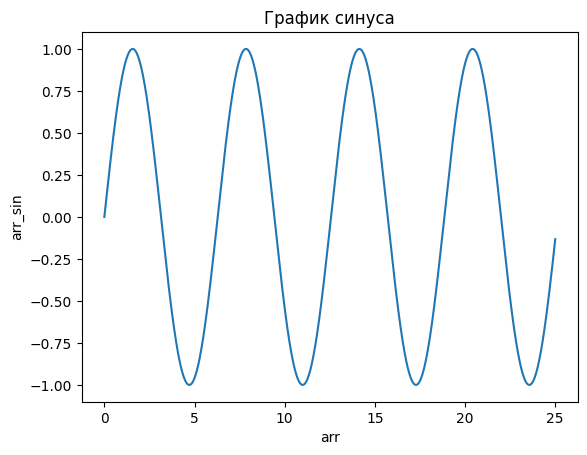

In [ ]:
import matplotlib.pyplot as plt


arr = np.linspace(0, 25, 1000)  # Создаёт массив из заданного количества вещественных равномерно распределённых значений из указанного диапазона
arr_sin = np.sin(arr)  # Универсальная функция
plt.plot(arr, arr_sin)
plt.title('График синуса')
plt.xlabel('arr')
plt.ylabel('arr_sin')
plt.show()

Функции аггрегации (их больше, но синтаксис такой).

In [ ]:
arr = np.array([1, 2, 3])
print(np.sum(arr))  # Аналогично arr.sum()
print(np.max(arr))  # Аналогично arr.max()

6
3


Функция `sort` возвращает отсортированную копию, метод `sort` сортирует на месте.

In [ ]:
arr = [1, -1, 9, 99, 2, 0]
print(np.sort(arr))
print(arr)

[-1  0  1  2  9 99]
[1, -1, 9, 99, 2, 0]


In [ ]:
arr.sort()
print(arr)

[-1, 0, 1, 2, 9, 99]


Про матрицы (и другие многомерные массивы).

In [ ]:
matrix = np.array([[9, 8, 7],
                   [6, 5, 4],
                   [3, 2, 1]])

In [ ]:
matrix.ndim, matrix.shape, matrix.size, len(matrix)  # Думаю, из названий всё очевидно

(2, (3, 3), 9, 3)

In [ ]:
matrix.shape = (1, 9)  # Аналог reshape
matrix

array([[9, 8, 7, 6, 5, 4, 3, 2, 1]])

In [ ]:
print(matrix.ravel())  # Можно "вытянуть" многомерный массив в одномерный
print(matrix.flatten())

[9 8 7 6 5 4 3 2 1]
[9 8 7 6 5 4 3 2 1]


In [ ]:
# Базовые операции над матрицами

matrix1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

print("Умножение на скаляр:")
print(matrix1 * 2)
print()
print("Сложение матриц:")
print(matrix1 + matrix2)
print()
print("Произведение матриц:")
print(matrix1 @ matrix2)
print()
print("Транспонирование матрицы:")
print(matrix1.T)

Умножение на скаляр:
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]

Сложение матриц:
[[10 10 10]
 [10 10 10]
 [10 10 10]]

Произведение матриц:
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]

Транспонирование матрицы:
[[1 4 7]
 [2 5 8]
 [3 6 9]]



Объединение массивов. Обратите внимание на этот пункт, он вам пригодится.

In [ ]:
a = np.array([1, 2, 3])
b = np.array([100, 200, 300])

print(np.hstack((a, b)))  # Объединение массивов по-горизонтали (horizontal stack)
print()
print(np.vstack((a, b)))  # Объединение массивов по-вертикали (vertical stack)
print()
print(np.dstack((a, b)))  # Объединение массивов наложением (dimensional stack)

[  1   2   3 100 200 300]

[[  1   2   3]
 [100 200 300]]

[[[  1 100]
  [  2 200]
  [  3 300]]]


То, для чего массивы подходят куда лучше списков - это работа с изображениями.

<class 'numpy.ndarray'>


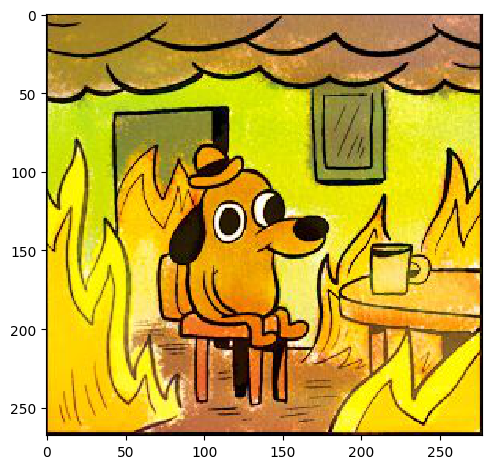

In [ ]:
from skimage.io import imread, imshow


img = imread('image.jpg')
print(type(img))
imshow(img)

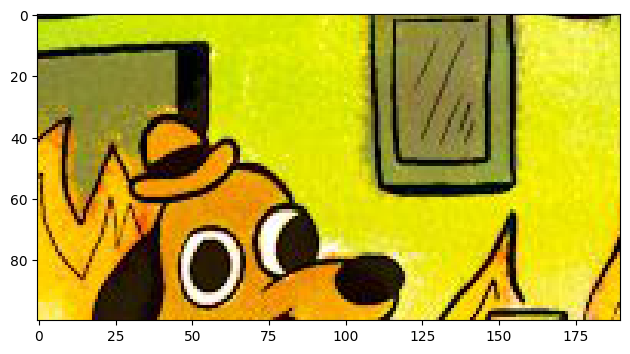

In [ ]:
imshow(img[50:150, 60:250])  # Срез

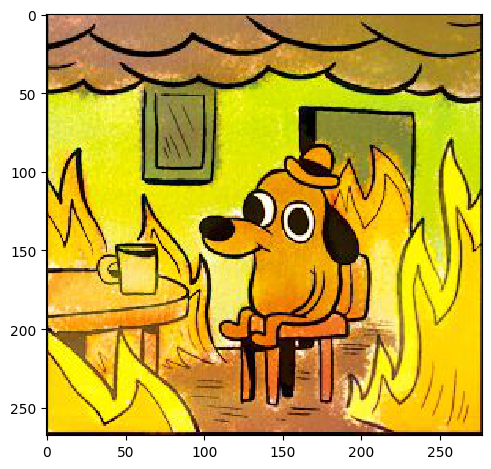

In [ ]:
imshow(np.flip(img, axis=1))  # Разворот массива, ноль - значит по строкам, 1 по столбцам

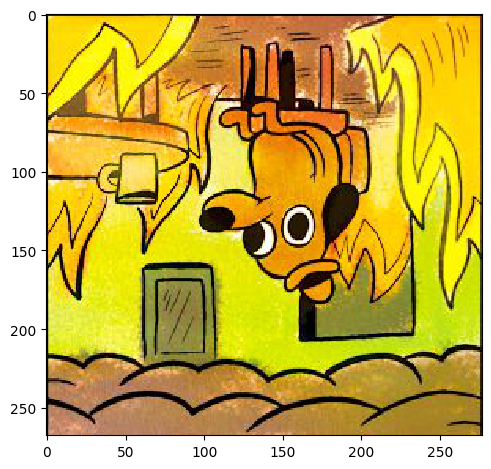

In [ ]:
imshow(np.rot90(img, k=2))  # Развернуть на 180 градусов, k - кол-во поворотов на 90 градусов

## pandas

Pandas - библиотека для работы с табличными данными. Чем-то похож на Excel, но вы работаете с помощью инструментов Python.

In [ ]:
import pandas as pd  # Импорт библиотеки


pd.__version__

'1.5.3'

Таблица, или датафрейм, - основной объект, с которым работает pandas. Датафрейм состоит из столбцов (или серий, Series).

Не путайте "датафрейм" и "датасет". Первое - это объект pandas, таблица. Второе - это любой набор данных.

In [ ]:
sample_df = pd.util.testing.makeMixedDataFrame()  # Создадим случайные данные, чтобы увидеть, как выглядит таблица
print(sample_df.shape)  # Размерность таблицы
print(sample_df.dtypes)  # Типы данных столбцов
sample_df

(5, 4)
A           float64
B           float64
C            object
D    datetime64[ns]
dtype: object


,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


In [ ]:
pd.Series([1, 7, 2], index = ["x", "y", "z"])  # Series

x    1
y    7
z    2
dtype: int64

У таблицы есть индексы и названия колонок. И те, и другие не обязательно совпадают с фактической нумерацией строк и столбцов по количеству. Обращаться к частям датафрейма можно так:

In [ ]:
sample_df['A']  # Столбец

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: A, dtype: float64

In [ ]:
sample_df[['A', 'B']]  # Несколько столбцов

,A,B
0,0.0,0.0
1,1.0,1.0
2,2.0,0.0
3,3.0,1.0
4,4.0,0.0


In [ ]:
sample_df.loc[1]  # Строка по имени индекса

A                    1.0
B                    1.0
C                   foo2
D    2009-01-02 00:00:00
Name: 1, dtype: object

In [ ]:
sample_df.loc[[1, 3]]  # Несколько строк

,A,B,C,D
1,1.0,1.0,foo2,2009-01-02
3,3.0,1.0,foo4,2009-01-06


In [ ]:
sample_df.iloc[0]  # Строка по фактическому индексу

A                    0.0
B                    0.0
C                   foo1
D    2009-01-01 00:00:00
Name: 0, dtype: object

In [ ]:
sample_df.at[0, 'D']  # Запись по имени индекса и имени столбца

Timestamp('2009-01-01 00:00:00')

In [ ]:
sample_df.iat[1, 2]  # Запись по фактическому индексу и столбцу

'foo2'

In [ ]:
sample_df.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
sample_df.values

array([[0.0, 0.0, 'foo1', Timestamp('2009-01-01 00:00:00')],
       [1.0, 1.0, 'foo2', Timestamp('2009-01-02 00:00:00')],
       [2.0, 0.0, 'foo3', Timestamp('2009-01-05 00:00:00')],
       [3.0, 1.0, 'foo4', Timestamp('2009-01-06 00:00:00')],
       [4.0, 0.0, 'foo5', Timestamp('2009-01-07 00:00:00')]], dtype=object)

In [ ]:
sample_df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Поговорим про создание и основные характеристики датафрейма.

In [ ]:
data = {
    'Name': ['John', 'Alice', 'Mike', 'Emma', 'James'],
    'Age': [25, 22, 30, 28, 24],
    'Salary': [50000, 60000, 45000, 70000, 55000]
}

df = pd.DataFrame(data)  # Чаще всего вы будете создавать датафрейм из словаря
df.head(3)  # Верхние 3 записи. Также есть tail() для отбора нижних записей и sample() для отбора случайных

,Name,Age,Salary
0,John,25,50000
1,Alice,22,60000
2,Mike,30,45000


In [ ]:
df.to_csv('data.csv', index=False)  # С помощью этой команды можно сохранять данные в CSV-файл
df = pd.read_csv('data.csv', sep = ',')  # А с помощью этой - читать. sep - это разделитель, с которым были записаны данные, по умолчанию запятая

In [ ]:
df.info()  # Основная информация про датафрейм

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Salary  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [ ]:
pd.concat([df.dtypes.to_frame('Data type'), df.isna().sum().to_frame('Count NaN'), df.nunique().to_frame('Count unique')], axis=1).T  # Общая сводка

,Name,Age,Salary
Data type,object,int64,int64
Count NaN,0,0,0
Count unique,5,5,5


In [ ]:
df.describe()  # Информация про числовые данные

,Age,Salary
count,5.000000,5.000000
mean,25.800000,56000.000000
std,3.193744,9617.692031
min,22.000000,45000.000000
25%,24.000000,50000.000000
50%,25.000000,55000.000000
75%,28.000000,60000.000000
max,30.000000,70000.000000


Манипуляции с данными.

In [ ]:
old_df = df.copy()  # Создание копии

In [ ]:
df['Gender'] = ['Male', 'Female', 'Male', 'Female', 'Male']  # Добавление новой колонки или замена значений, если колонка с таким именем уже существует

df.drop('Salary', axis=1, inplace=True)  # Удаление колонки. inplace=True значит, что действие будет произведено над исходной таблицей без создания её копии

df

,Name,Age,Gender
0,John,25,Male
1,Alice,22,Female
2,Mike,30,Male
3,Emma,28,Female
4,James,24,Male


Фильтрация и отбор по условию.

In [ ]:
df['Age'] > 25

0    False
1    False
2     True
3     True
4    False
Name: Age, dtype: bool

In [ ]:
df[df['Age'] > 25]

,Name,Age,Gender
2,Mike,30,Male
3,Emma,28,Female


In [ ]:
df[(df['Age'] > 25) & (df['Gender'] == 'Male')]

,Name,Age,Gender
2,Mike,30,Male


In [ ]:
df[df['Name'].isin(['Mike', 'Alice', 'John'])]

,Name,Age,Gender
0,John,25,Male
1,Alice,22,Female
2,Mike,30,Male


Еще полезные штуки.

In [ ]:
df.sort_values(by='Age')  # Сортировка по значениям

,Name,Age,Gender
1,Alice,22,Female
4,James,24,Male
0,John,25,Male
3,Emma,28,Female
2,Mike,30,Male


In [ ]:
df.nlargest(3, 'Age')  # Записи с самыми большими значениями. Также есть nsmallest

,Name,Age,Gender
2,Mike,30,Male
3,Emma,28,Female
0,John,25,Male


In [ ]:
df.groupby('Gender')['Age'].mean()  # Группировка с аггрегацией. Есть разные функции аггрегации - max, min, sum, mean, median, mode

Gender
Female    25.000000
Male      26.333333
Name: Age, dtype: float64

In [ ]:
df.Gender.value_counts(normalize=True)  # Подсчет кол-во значений в группе и их соотношение

Male      0.6
Female    0.4
Name: Gender, dtype: float64

А еще со столбцами и строками датафрейма можно работать как с numpy-массивами и производить арифметические операции.

In [ ]:
df['Year'] - 2000

0    15
1    16
2    17
3    18
4    19
Name: Year, dtype: int64

In [ ]:
df['Year'] + df['Sales']

0    2515
1    2616
2    2717
3    2818
4    2919
dtype: int64

In [ ]:
df.T  # Транспонирование таблицы

,0,1,2,3,4
Year,2015,2016,2017,2018,2019
Sales,500,600,700,800,900


In [ ]:
df.Sales.tolist()  # Преобразование Series в обычный список

[500, 600, 700, 800, 900]

Базовая визуализация.

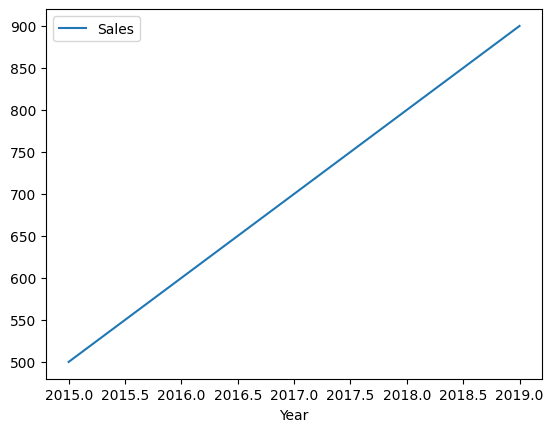

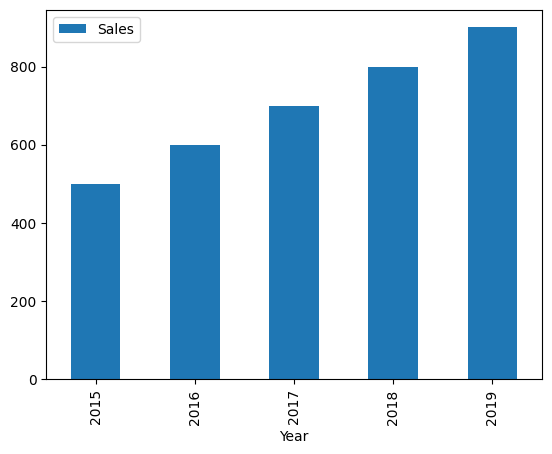

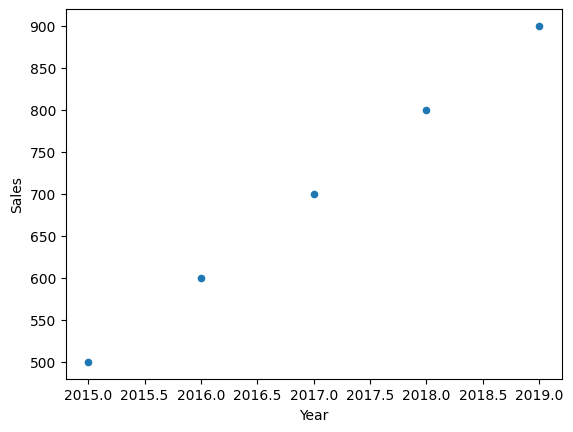

In [ ]:
import matplotlib.pyplot as plt


data = {
    'Year': [2015, 2016, 2017, 2018, 2019],
    'Sales': [500, 600, 700, 800, 900]
}

df = pd.DataFrame(data)

# Line plot
df.plot(x='Year', y='Sales', kind='line')

# Bar plot
df.plot(x='Year', y='Sales', kind='bar')

# Scatter plot
df.plot(x='Year', y='Sales', kind='scatter')

plt.show()

## matplotlib

Matplotlib — это библиотека, используемая для создания статических, интерактивных и анимированных визуализаций.

In [ ]:
import matplotlib.pyplot as plt  # Импорт библиотеки

Посмотрим, как строить базовые графики.

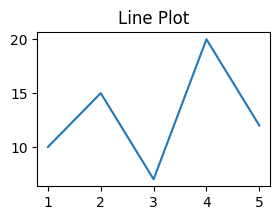

In [ ]:
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 20, 12]

fig = plt.figure(figsize=(3, 2))  # Размер графика
plt.plot(x, y)  # Построение линейного графика
plt.title('Line Plot')  # Задание заголовка
plt.show()  # Отображение графика

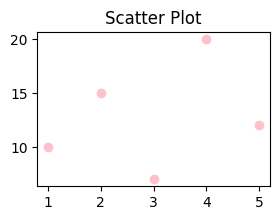

In [ ]:
fig = plt.figure(figsize=(3, 2))
plt.scatter(x, y, c='pink')  # Построение точеченого графика. Можно передать дополнительные аргументы
plt.title('Scatter Plot')
plt.show()

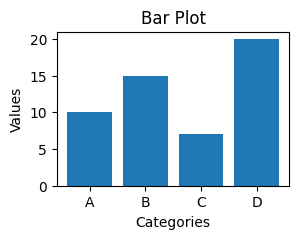

In [ ]:
categories = ['A', 'B', 'C', 'D']
values = [10, 15, 7, 20]

fig = plt.figure(figsize=(3, 2))
plt.bar(categories, values)  # Так называемый "барплот". Обычно на оси X откладываются категории, а на оси Y кол-во элементов в каждой категории
plt.xlabel('Categories')  # Задание наименования для оси X
plt.ylabel('Values')  # Задание наименования для оси Y
plt.title('Bar Plot')
plt.show()

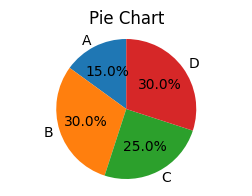

In [ ]:
categories = ['A', 'B', 'C', 'D']  # Значения
sizes = [15, 30, 25, 30]  # Проценты для каждого значения

fig = plt.figure(figsize=(3, 2))
plt.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=90)  # Круговая диаграмма. Не используйте её, если у вас больше пяти категорий
plt.title('Pie Chart')
plt.axis('equal')
plt.show()

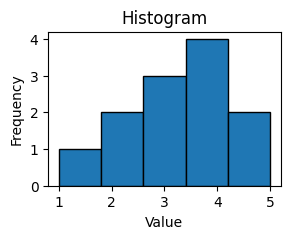

In [ ]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5]

fig = plt.figure(figsize=(3, 2))
plt.hist(data, bins=5, edgecolor='black')  # Гистограмма. Показывает плотность распределения объектов в выборке. Похожа на барплот, но для непрерывных множеств
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

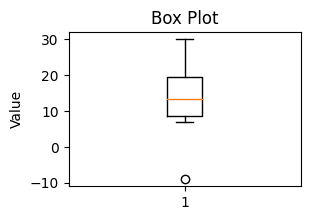

In [ ]:
data = [10, 15, 7, 20, 12, 25, 30, 8, 18, -9]

fig = plt.figure(figsize=(3, 2))
plt.boxplot(data)  # Боксплот, коробчатая диаграмма или ящик с усами. Статистический инструмент, позволяет наглядно оценить параметры распределения
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

Графики достаточно легко кастомизировать.

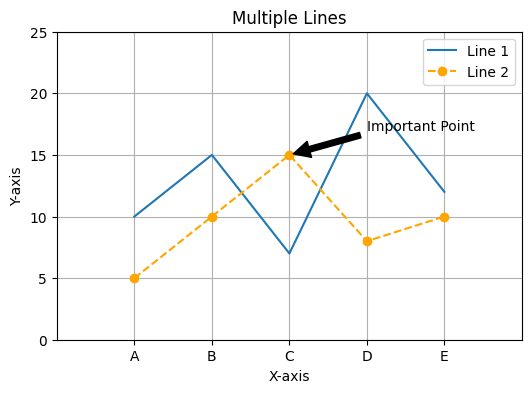

In [ ]:
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 7, 20, 12]
y2 = [5, 10, 15, 8, 10]

fig = plt.figure(figsize=(6, 4))  # Размер графика
plt.plot(x, y1, label='Line 1')  # Первый график
plt.plot(x, y2, linestyle='--', color='orange', marker='o', label='Line 2')  # Второй график
plt.xlabel('X-axis')  # Название оси X
plt.ylabel('Y-axis')  # Название оси Y
plt.xlim(0, 6)  # Границы по оси X
plt.ylim(0, 25)  # Границы по оси Y
plt.xticks([1, 2, 3, 4, 5], ['A', 'B', 'C', 'D', 'E'])  # Кастомные значения по оси
plt.title('Multiple Lines')  # Заголовок
plt.legend()  # Легенда. Используется, когда у нас несколько графиков на одной плоскости
plt.annotate('Important Point', xy=(3, 15), xytext=(4, 17),
             arrowprops=dict(facecolor='black', shrink=0.05))  # Добавление элементов "поверх"
plt.grid(True)  # Сетка
plt.savefig('line_plot.png')  # Так можно сохранить график
plt.show()

Обратите внимание:

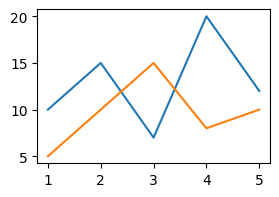

In [ ]:
fig = plt.figure(figsize=(3, 2))
plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2')
plt.show()

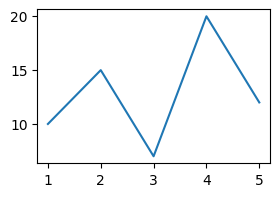

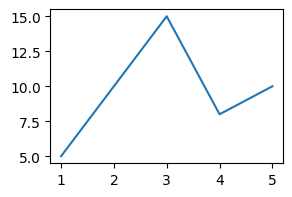

In [ ]:
fig = plt.figure(figsize=(3, 2))
plt.plot(x, y1, label='Line 1')
plt.show()

fig = plt.figure(figsize=(3, 2))
plt.plot(x, y2, label='Line 2')
plt.show()

Можно создать несколько графиков на одном "холсте".

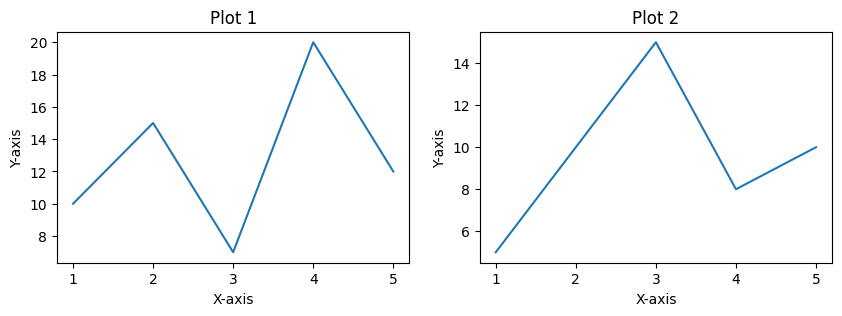

In [ ]:
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 7, 20, 12]
y2 = [5, 10, 15, 8, 10]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax1.plot(x, y1)
ax1.set_title('Plot 1')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')

ax2.plot(x, y2)
ax2.set_title('Plot 2')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')

plt.show()

Еще графики можно делать интерактивными, хотя для этого лучше использовать не чистый matplotlib, а, например, plotly или panel.

In [ ]:
from ipywidgets import interact


@interact(x=(1, 10))
def plot_line(x):
    y = [i * x for i in range(1, 6)]
    fig = plt.figure(figsize=(3, 2))
    plt.plot(range(1, 6), y)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Line Plot for x={x}')
    plt.show()

interactive(children=(IntSlider(value=5, description='x', max=10, min=1), Output()), _dom_classes=('widget-int…

Можно строить 3D графики.

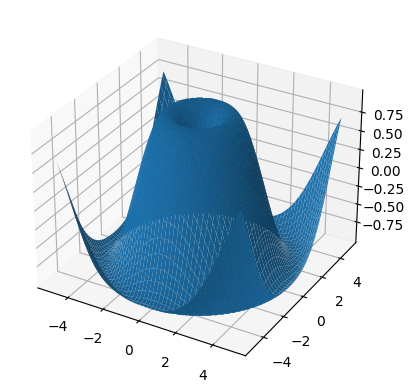

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

Также у matplotlib есть подмодуль для визуализации географических объектов.

In [ ]:
%%capture
!pip install basemap

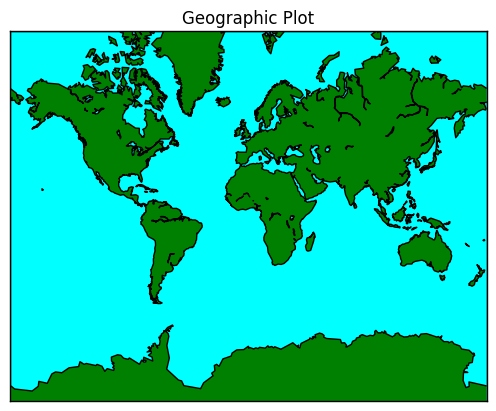

In [ ]:
from mpl_toolkits.basemap import Basemap


m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')

m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='green', lake_color='aqua')

plt.title('Geographic Plot')
plt.show()